In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

DATA PREPROCESSING

In [2]:
df = pd.read_csv('/Users/sanjith/Downloads/Loan_default.csv')
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
del df['LoanID']

In [5]:
df.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

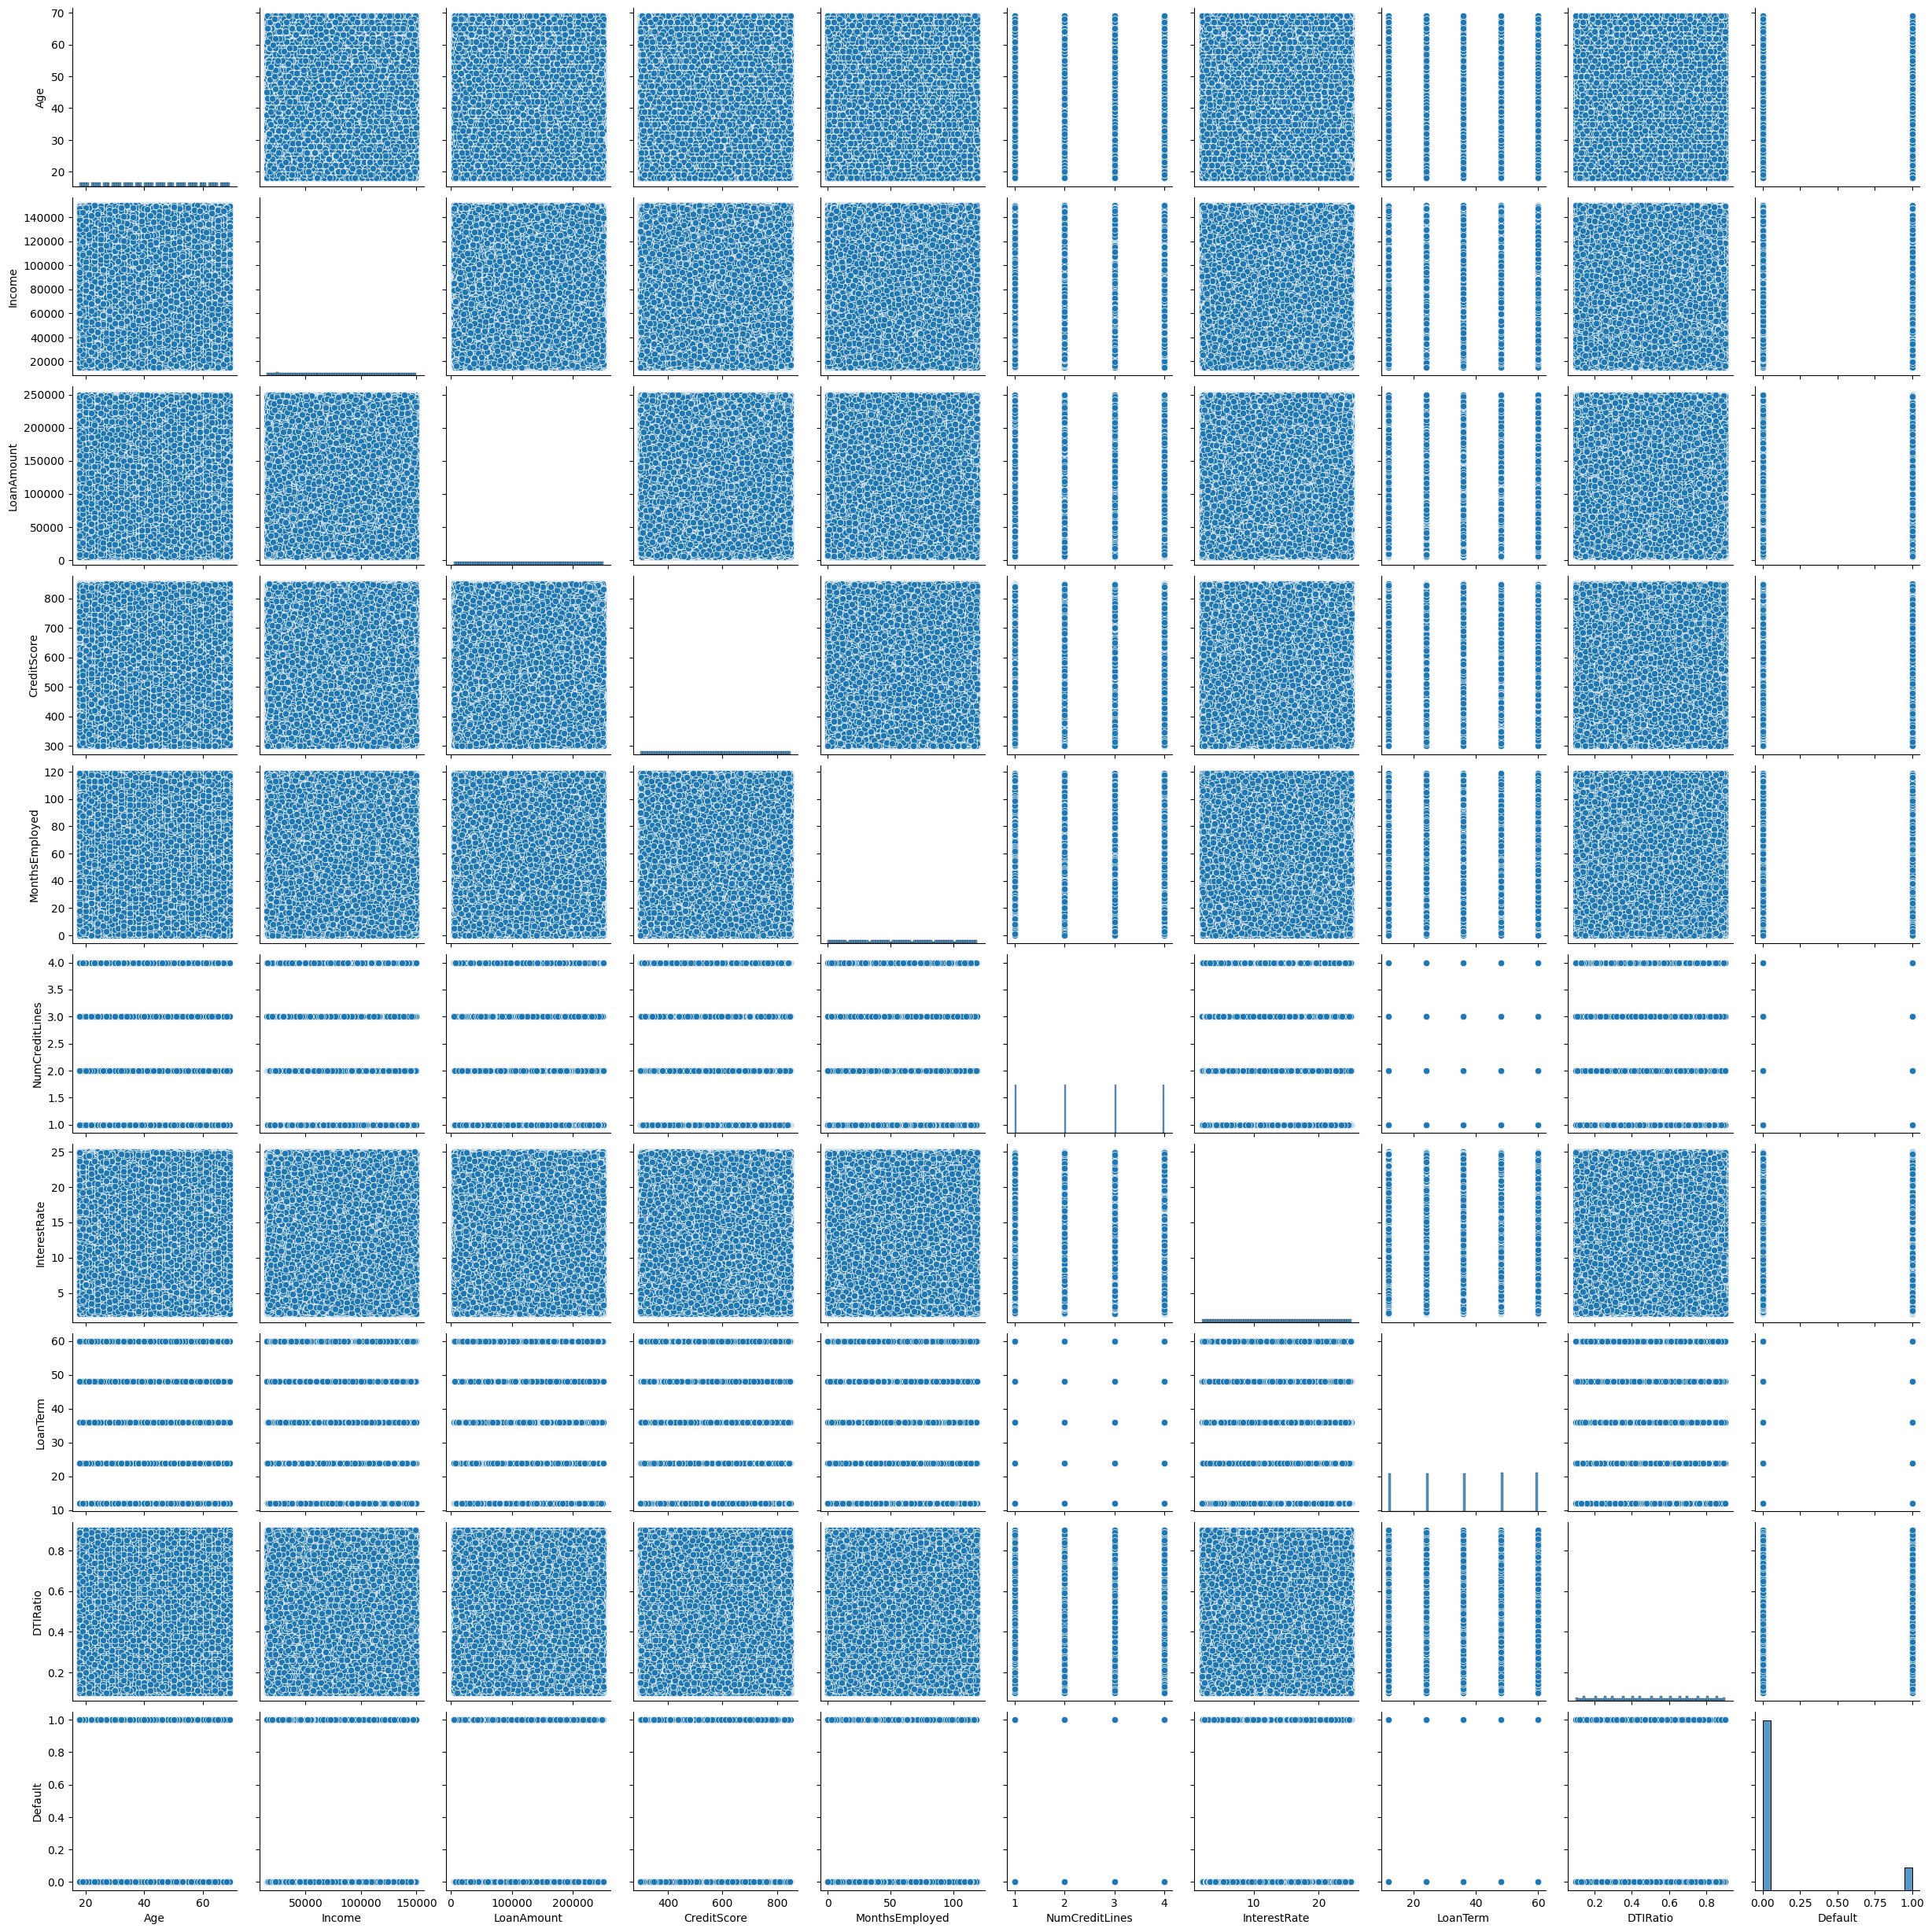

In [6]:
sns.pairplot(df)

<Axes: >

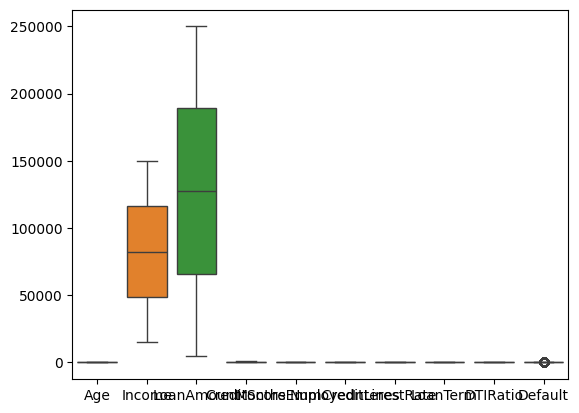

In [7]:
sns.boxplot(df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

<Axes: >

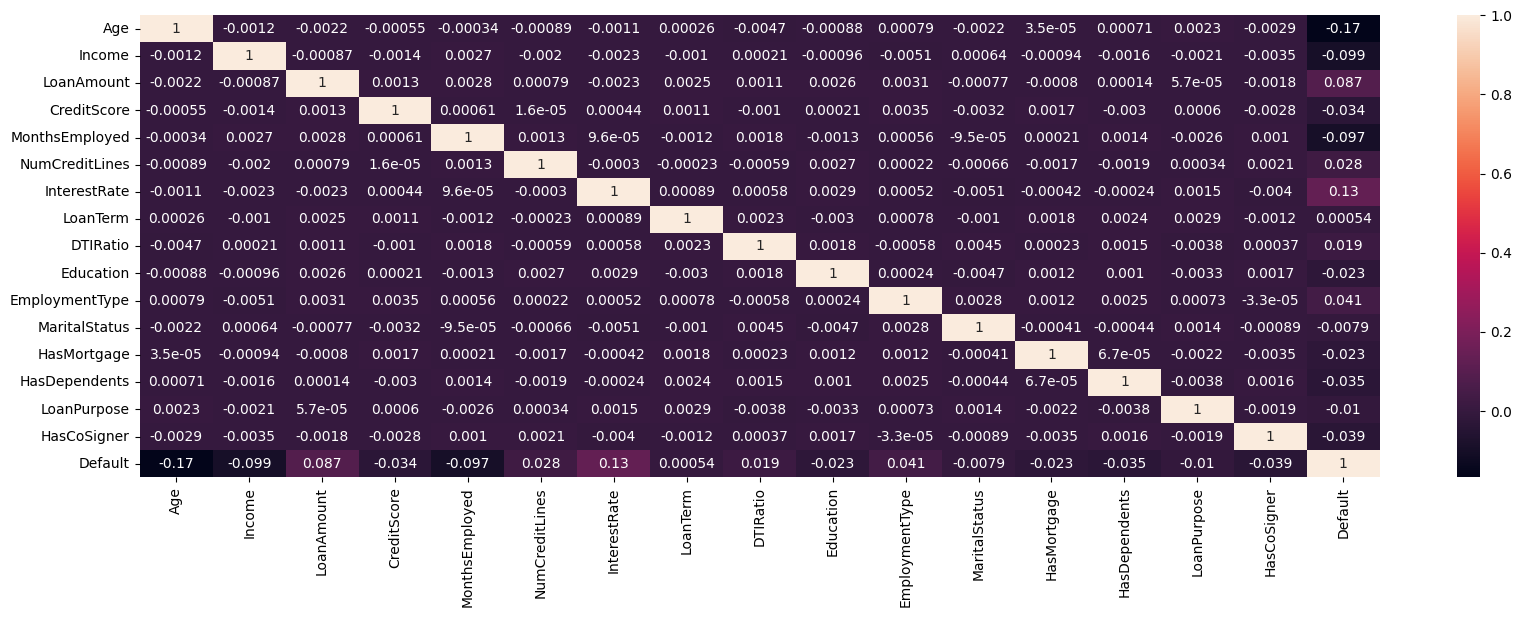

In [9]:
corelation = df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corelation,annot=True)

Direct model building

In [10]:
X = df.drop(["Default"], axis = 1)
y = df['Default']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=320)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction = gbc.predict(X_test)

report = classification_report(y_test,gbc_prediction, output_dict=True)
print(classification_report(y_test,gbc_prediction))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45129
           1       0.62      0.05      0.09      5941

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [12]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_prediction = rfc.predict(X_test)
report = classification_report(y_test,rfc_prediction, output_dict=True)
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45129
           1       0.61      0.05      0.09      5941

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



In [13]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

Data scaling and Class imbalance rectification

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123, sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=320)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_prediction1 = rfc.predict(X_test)
report = classification_report(y_test,rfc_prediction1, output_dict=True)
print(classification_report(y_test,rfc_prediction1))
rix = confusion_matrix(y_test,rfc_prediction1)
print('\n')
print(rix)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     45138
           1       0.90      0.85      0.88     45140

    accuracy                           0.88     90278
   macro avg       0.88      0.88      0.88     90278
weighted avg       0.88      0.88      0.88     90278



[[40936  4202]
 [ 6676 38464]]


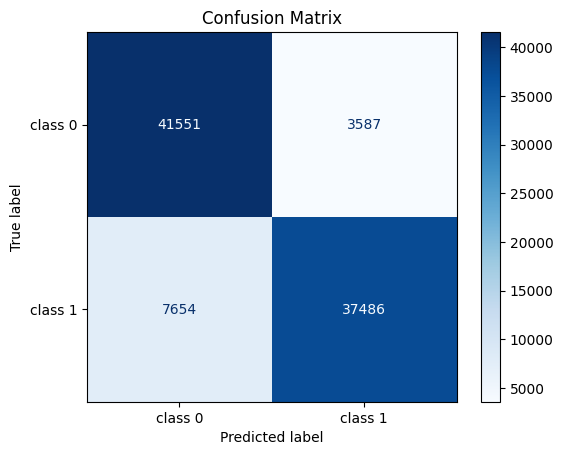

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=rix,display_labels=["class 0","class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction1 = gbc.predict(X_test)

report = classification_report(y_test,gbc_prediction1, output_dict=True)
print(classification_report(y_test,gbc_prediction1))
rix = confusion_matrix(y_test,gbc_prediction1)
print('\n')
print(rix)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     45138
           1       0.91      0.83      0.87     45140

    accuracy                           0.88     90278
   macro avg       0.88      0.88      0.88     90278
weighted avg       0.88      0.88      0.88     90278



[[41551  3587]
 [ 7654 37486]]


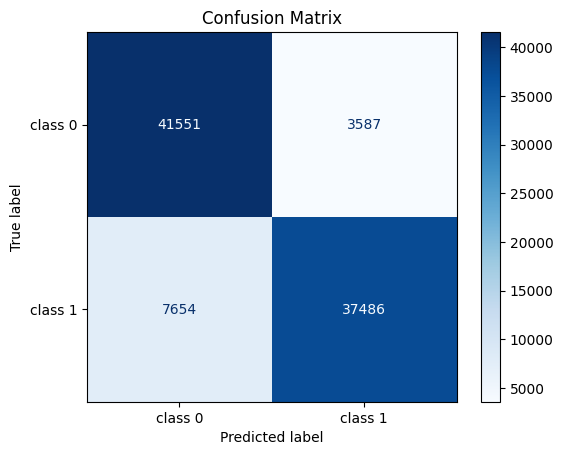

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=rix,display_labels=["class 0","class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [30]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer,Dense

input_neurons = X_train.shape[1]
output_neurons = 1
hidden_layers = 5
neuron_hidden1 = 15
neuron_hidden2 = 10
neuron_hidden3 = 8
neuron_hidden4 = 4
neuron_hidden5 = 1
model = Sequential()

In [31]:
model.add(InputLayer(input_shape = (input_neurons,) ))
model.add(Dense(units=neuron_hidden1,activation='relu'))
model.add(Dense(units=neuron_hidden2,activation='relu'))
model.add(Dense(units=neuron_hidden3,activation='relu'))
model.add(Dense(units=neuron_hidden4,activation='relu'))
model.add(Dense(units=neuron_hidden5,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_history = model.fit(X_train,y_train,epochs=100)
prediction = model.predict(X_test)

Epoch 1/100
